# Домашняя работа №1.

In [259]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [260]:
df = pd.read_csv('kc_house_data.csv')
df.drop(['id', 'date'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [261]:
null_table = df.isnull().sum()
null_table[null_table > 0]

sqft_above    2
dtype: int64

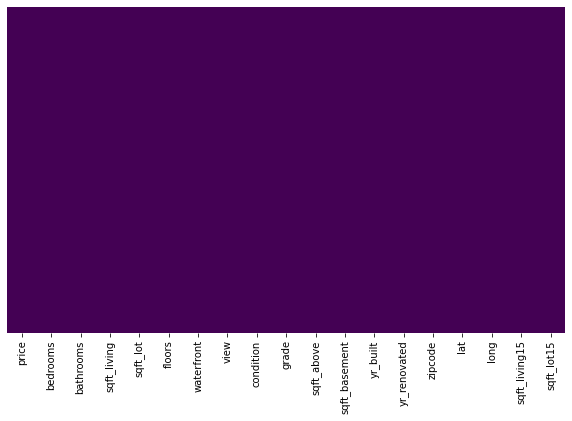

In [262]:
fig, ax = plt.subplots(figsize=(10,6))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Кратчайшая предобработка данных

In [263]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [264]:
var_cat = ['view', 'zipcode', 'condition', 'grade', 'waterfront']
var_real = list(set(df.columns) - set(var_cat))

df[var_cat] = df[var_cat].astype(str)
df = pd.get_dummies(df, drop_first=True)

In [265]:
df["sqft_above"].fillna(1788.39,inplace=True)

### А отсюда начнется тру-мл

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [267]:
X = df.drop('price', axis=1)
y = df['price']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(17290, 102) (4323, 102)
(17290,) (4323,)


In [269]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

LinearRegression()

In [270]:
y_pred = model_lr.predict(X_test)
print(mae(y_test, y_pred))
print(np.mean(y_test))

87305.35353001527
535845.699745547


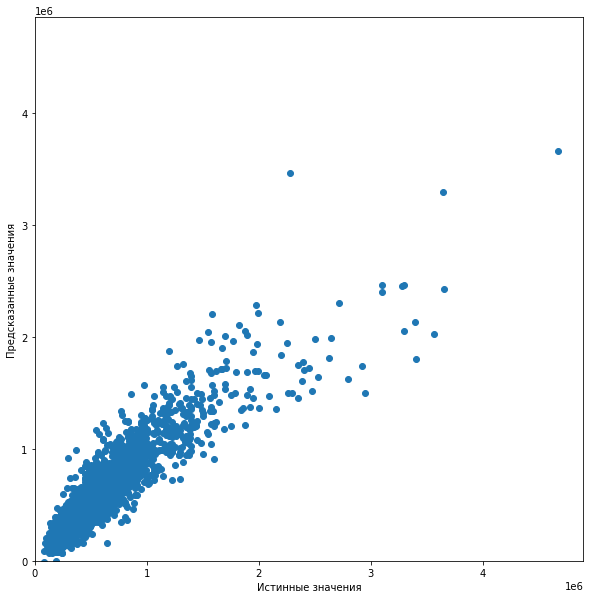

In [271]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [272]:
model = LinearRegression()

mae_val = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(-1*mae_val)
print('Среднее значение ошибки:', np.mean(-1*mae_val))
print('Стандартное отклонение ошибки:', np.std(-1*mae_val))

[8.98733751e+04 9.02406419e+04 8.86532686e+04 8.96759146e+04
 4.93876365e+09]
Среднее значение ошибки: 987824418.0477108
Стандартное отклонение ошибки: 1975469614.4953835


# начало домашки


### Задача №1


In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

### Построим решающее дерево


In [274]:
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [275]:
y_predict = model_decision_tree.predict(X_test)
print(mae(y_test, y_predict))

101891.15093684942


In [276]:
param_grid = {'max_depth': [3, 5, 7, 10, 15], 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
param_grid = {'max_depth': [3, 5, 7, 10, 15]}


grid_cv = GridSearchCV(model_decision_tree, param_grid, cv = 5, scoring='neg_mean_absolute_error')


grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10, 15]},
             scoring='neg_mean_absolute_error')

In [277]:
print('best params:', grid_cv.best_params_)
print('best result:', grid_cv.best_score_)

best params: {'max_depth': 10}
best result: -93626.0069502828


In [278]:
model_decision_tree = grid_cv.best_estimator_
y_predict = model_decision_tree.predict(X_test)
print(mae(y_test, y_predict))

91941.03800139649


### Задача №2

In [530]:
records = features = 0
records, features =  X.shape
print(f"records={records}, features={features}.")


w0 = np.array([y.mean()]*features)
#w0 = np.array([0]*features, dtype = float)
eps = None
step_size = 0.001
cnt_steps = 100
print(f"w0={w0}")



records=21613, features=102.
w0=[540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14176653
 540088.14176653 540088.14176653 540088.14176653 540088.14

In [540]:
class MyGradientRegressionModel:
    
    def __init__(self, _step_size = 0.1 , _w0 = [], _cnt_steps = 0, _epsylon = None):
        self.step_size = _step_size
        self.w0 = np.copy(_w0) 
        self.w = np.copy(_w0)
        self.cnt_steps = _cnt_steps
        self.epsylon = _epsylon  
        self.Q = None
    
    def stochastic_gd(self, X, y):
        records, features =  X.shape
        temp = np.array([0]*records, dtype = float)
        self.Q = np.array([0]*features, dtype = float)
        w_next = np.copy(self.w0)
        X_T = X.T     
        for i in range (self.cnt_steps):
            print(f"Step {i}.")
            w_cur = np.copy(w_next)
            np.dot(X, w_cur, temp)
            temp = temp - y.iloc[i]
            np.dot((2 * X_T), temp, self.Q)
            w_next = w_cur - self.step_size * self.Q
            print(f"Step {i}. w_next:\n {w_next}\n")
            if self.epsylon:
                if np.linalg.norm(w_next - w_cur) < self.epsylon:
                    self.w = np.copy(w_next)
                    return w_next
        self.w = np.copy(w_next)
        return w_next    

    def predict(self, X):
        records, features =  X.shape
        y_pred = np.array([0]*records, dtype = float)
        np.dot(X, self.w, y_pred)
        print(f"Prediction: {y_pred}")
        return y_pred

    def print(self):
        print("MyGradientRegressionModel details.\n")
        print(f"w0 = {self.w0}")
        print(f"Step size = {self.step_size}")
        print(f"Count of steps = {self.cnt_steps}")
        print(f"Epsylon = {self.epsylon}")
            

In [541]:
#step_size = 0.000000000001
step_size = 0.00000000000001

cnt_steps = 10

model = MyGradientRegressionModel(step_size, w0, cnt_steps)
w = model.stochastic_gd(X_train, y_train)
print (w)
y_pred = model.predict(X_test)

Step 0.
Step 0. w_next:
 [540064.79552617 540072.77724757 523553.13018361 -55449.95206865
 540078.06119381 525686.72341627 537954.51709709 526757.74454633
 539463.69429768 539767.27639715 540912.59640373 524968.11767018
 152010.98780552 540088.05314464 540088.0501622  540087.72340779
 540087.81343805 540088.00021336 540088.04832353 540083.83344853
 540086.25910427 540087.68519626 540087.54318033 540087.8542431
 540088.07042089 540088.13122309 540088.13991706 540088.12961344
 540088.03732656 540087.6190844  540085.84681655 540086.42020151
 540087.01770221 540088.1046521  540088.07238242 540088.04039609
 540088.07193143 540087.98368452 540088.10431152 540088.07207459
 540088.04665918 540088.09278481 540087.92805961 540088.00171901
 540087.85765623 540088.01552346 540088.01077149 540087.89955263
 540088.06322836 540088.07310087 540088.08364942 540088.07547878
 540088.11304632 540088.03205101 540088.01597825 540087.85382223
 540088.11961309 540088.05045805 540087.9491378  540087.96076491
 

Step 9. w_next:
 [540021.7116868  540044.89566166 495070.87006111 -44894.77239187
 540059.06275494 501440.03878477 533718.8234938  502616.08126291
 538112.31270535 539185.45135036 542407.45905527 498557.67444926
   7519.21386982 540087.92112705 540087.82503036 540087.06316132
 540087.47781147 540087.73086067 540087.99444757 540075.6479967
 540083.21929621 540086.74101388 540086.62942323 540087.48228368
 540087.96937054 540088.10636511 540088.13887819 540088.12131544
 540087.96806289 540086.80630988 540081.38194426 540082.83017678
 540085.14366839 540088.0102285  540087.91511124 540087.79210608
 540087.95536953 540087.59838647 540088.015143   540087.9013258
 540087.99676379 540087.97861543 540087.89072295 540087.89681678
 540087.80037919 540087.7286433  540087.97907589 540087.62936914
 540087.89299483 540087.87227411 540087.94694712 540087.9338318
 540088.05026017 540087.75230387 540087.70655578 540087.52646089
 540088.06872778 540087.82671166 540087.67354732 540087.88188312
 540087.630

array([4.60033299e+09, 3.74827970e+09, 5.41703432e+09, ...,
       4.82338165e+09, 2.16384582e+09, 4.16632338e+09])

In [542]:
from sklearn.metrics import mean_absolute_error as mae
print(y_pred, "\n________________________________\n")
print(mae(y_test, y_pred))

[652625.55075631 278470.80169055 730195.32312202 ... 881499.71820021
 166040.77208275 355571.89153228] 
________________________________

87305.35353001527
